In [1]:
import numpy as np
np.random.seed(42)

In [2]:
X = 2* np.random.rand(100,1)        # Uniformly distributed array with dimension (100,1)

In [3]:
y = 4       +           3 * X       + np.random.randn(100,1)
#  theta 0          theta1                  gAUSSIAN nOISE

In [4]:
import matplotlib.pyplot as plt

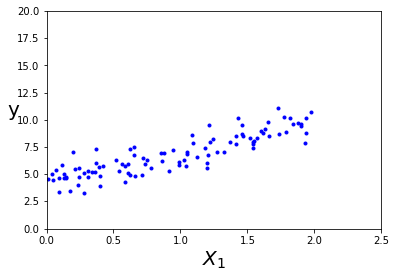

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.axis([0,2.5,0,20])
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)        # putting the vsalues in formulae

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

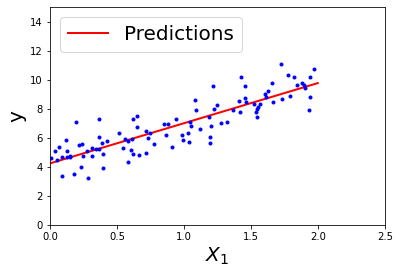

In [11]:
plt.plot(X_new,y_predict, 'r-',linewidth = 2, label = "Predictions")
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [14]:
lin_reg.intercept_ , lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

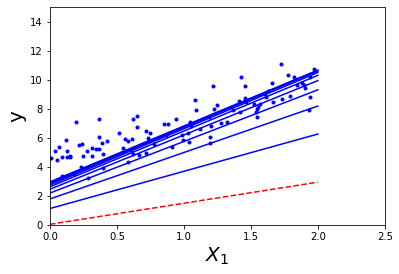

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    if iteration <10:
        y_predict = X_new_b.dot(theta)
        style = 'b-' if iteration > 0 else 'r--' 
        plt.plot(X_new, y_predict,style)
    theta = theta - eta* gradients
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.axis([0,2.5,0,15])
# plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [18]:
gradients

array([[-3.73034936e-15],
       [ 1.99852839e-15]])

In [30]:
def gradient_descent_check(eta, theta):
    m = len(X_b)    # number of rows/instances in my data
    for iteration in range(1000):
        delta_mse = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        if iteration <10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--' 
            plt.plot(X_new, y_predict,style)
        theta = theta - eta* delta_mse
    plt.plot(X,y,'b.')
    plt.xlabel("$X_1$", fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'n{eta}')
    plt.axis([0,2.5,0,15])

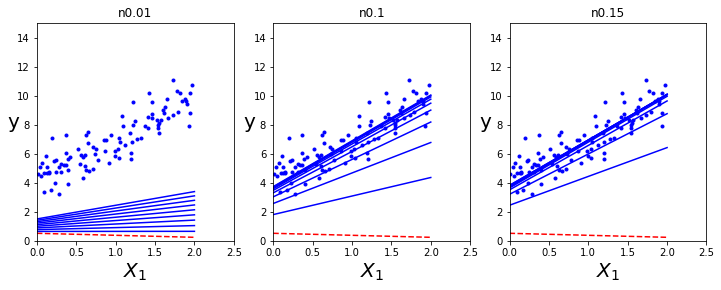

In [35]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
plt.subplot(131); gradient_descent_check(.01, theta)
plt.subplot(132); gradient_descent_check(0.1,theta)
plt.subplot(133); gradient_descent_check(0.15,theta)
plt.show()